In [1]:
from model import *
from data import *
import os
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import shutil
import time
# import winsound

In [2]:
time_start=time.time()
# tf.compat.v1.disable_eager_execution()
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [3]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [4]:
# work_list = 'H30S0.6V0.2'
batch_size = 8
train_size = len(os.listdir('G:/UNet2/data/ECU/train/'+'aug_image'))
val_size = len(os.listdir('G:/UNet2/data/ECU/valid/'+'aug_image'))
print(train_size,val_size)
trainGene = trainGenerator(batch_size,'data/ECU/train','aug_image','aug_label',data_gen_args,save_to_dir = None)
validGene = validGenerator(batch_size,'data/ECU/valid','aug_image','aug_label',save_to_dir = None)
model = unet()
# model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_checkpoint = ModelCheckpoint('after/unet_ECU-{epoch:02d}.hdf5', monitor='loss',verbose=1)
epochs = 20


24000 6000


In [5]:
history = model.fit_generator(
    trainGene,
    validation_data=validGene,
    validation_steps=val_size/batch_size, #tatalvalidationset/batchsize
    steps_per_epoch=train_size/batch_size, #totaltrainset/batchsize
    epochs=epochs,
    verbose=2, 
    shuffle=True,
    callbacks=[model_checkpoint])


Instructions for updating:
Please use Model.fit, which supports generators.
Found 24000 images belonging to 1 classes.
Found 24000 images belonging to 1 classes.
Epoch 1/20
Found 6000 images belonging to 1 classes.
Found 6000 images belonging to 1 classes.

Epoch 00001: saving model to after\unet_ECU-01.hdf5
3000/3000 - 1572s - loss: 0.2132 - accuracy: 0.9147 - val_loss: 0.1659 - val_accuracy: 0.9338
Epoch 2/20

Epoch 00002: saving model to after\unet_ECU-02.hdf5
3000/3000 - 1007s - loss: 0.1170 - accuracy: 0.9545 - val_loss: 0.1351 - val_accuracy: 0.9482
Epoch 3/20

Epoch 00003: saving model to after\unet_ECU-03.hdf5
3000/3000 - 1008s - loss: 0.0871 - accuracy: 0.9664 - val_loss: 0.1307 - val_accuracy: 0.9537
Epoch 4/20

Epoch 00004: saving model to after\unet_ECU-04.hdf5
3000/3000 - 1006s - loss: 0.0697 - accuracy: 0.9731 - val_loss: 0.1189 - val_accuracy: 0.9572
Epoch 5/20

Epoch 00005: saving model to after\unet_ECU-05.hdf5
3000/3000 - 1146s - loss: 0.0576 - accuracy: 0.9777 - val_

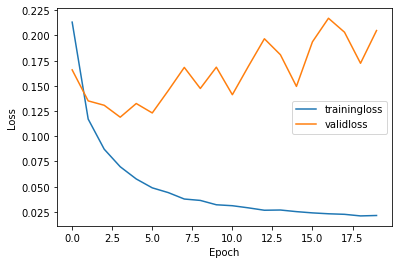

In [6]:
imagename = 'Loss'
    # print(a)
y1 = history.history['loss']
y2 = history.history['val_loss']
    # print(y)
x = np.array(range(epochs))
    # print(x.shape)
plt.plot(x,y1, label = 'trainingloss')
plt.plot(x,y2, label = 'validloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Loss'+'.png')
plt.show()

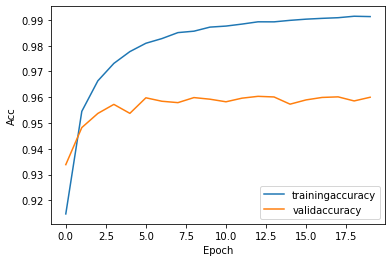

In [7]:
imagename = 'Loss'
    # print(a)
y1 = history.history['accuracy']
y2 = history.history['val_accuracy']
    # print(y)
x = np.array(range(epochs))
    # print(x.shape)
plt.plot(x,y1, label = 'trainingaccuracy')
plt.plot(x,y2, label = 'validaccuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.savefig('Acc'+'.png')
plt.show()

In [4]:
test_file = 'G:/Han/image'
model = keras.models.load_model('G:/UNet2/211023/after/unet_ECU-03.hdf5')
sigmoid_file = 'G:/UNet2/Han'
test_names = os.listdir(test_file)
test_size = len(test_names)
# print(test_size)
# work_list = 'Hue/change/60'
testGene = testGenerator(test_file, test_size)
# results = model.predict(testGene,batch_size=1,verbose=1)
results = model.predict(
    testGene, batch_size=None, verbose=0, steps=test_size, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=False)

if not os.path.exists(sigmoid_file):
    os.makedirs(sigmoid_file)
    
saveResult(sigmoid_file,test_names,results)

prediction_path = sigmoid_file
binary_path = prediction_path

image_names = os.listdir(test_file)

if not os.path.exists(binary_path):
    os.makedirs(binary_path)
print('Binary-Size converter working')
for image_name in tqdm(image_names):

    image = cv2.imread(os.path.join(test_file,image_name))
    prediction = cv2.imread(os.path.join(prediction_path,image_name),0)
    # print(image_name, image.shape)
    size = (image.shape[1],image.shape[0])
    prediction = cv2.resize(prediction,size)
    ret, prediction = cv2.threshold(prediction, 127, 255, cv2.THRESH_BINARY)
    # print(prediction)
    # plt.imshow(prediction)
    # plt.show()
    cv2.imwrite(os.path.join(binary_path,image_name), prediction)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

testGenerator Working


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

Saving Begin


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 52.21it/s]

Binary-Size converter working
